In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
from sklearn.preprocessing import OneHotEncoder
import statsmodels.formula.api as smf
import numpy as np

%matplotlib inline

In [2]:
data=pd.read_csv("50_Startups.csv")
data
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
#check for missing values
data.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [6]:
data.shape

(50, 5)

In [21]:
df=data.rename(columns={"R&D Spend":"R_D","Marketing Spend":"MS","Administration":"Adm"})
df

,R_D,Adm,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [22]:
df.drop(labels=['State'],axis=1)
df.head()

,R_D,Adm,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [23]:
df.corr()

,R_D,Adm,MS,Profit
R_D,1.000000,0.241955,0.724248,0.972900
Adm,0.241955,1.000000,-0.032154,0.200717
MS,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


<AxesSubplot:>

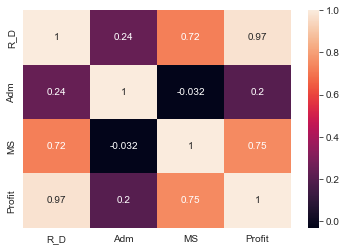

In [24]:
sns.heatmap(df.corr(),annot=True)

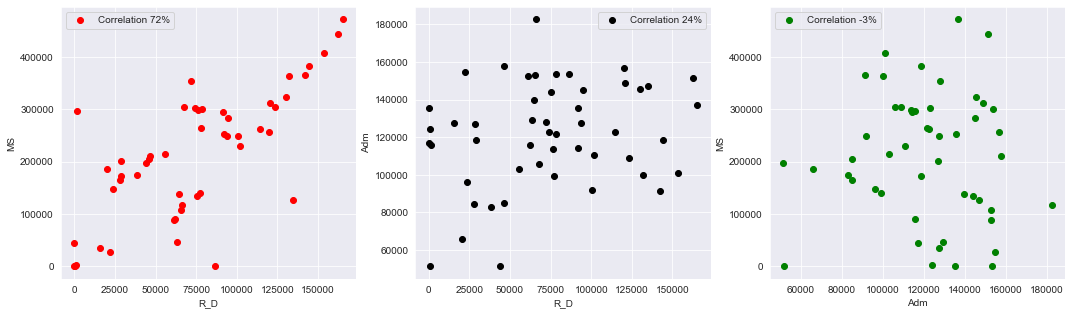

In [25]:
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
plt.scatter(df['R_D'],df['MS'],label='Correlation 72%',color='red')
plt.xlabel('R_D')
plt.ylabel('MS')
plt.legend(loc='best')
plt.subplot(1,3,2)
plt.scatter(df['R_D'],df['Adm'],label='Correlation 24%',color='black')
plt.xlabel('R_D')
plt.ylabel('Adm')
plt.legend(loc='best')
plt.subplot(1,3,3)
plt.scatter(df['Adm'],df['MS'],label='Correlation -3%',color='green')
plt.xlabel('Adm')
plt.ylabel('MS')
plt.legend(loc='best')
plt.show()

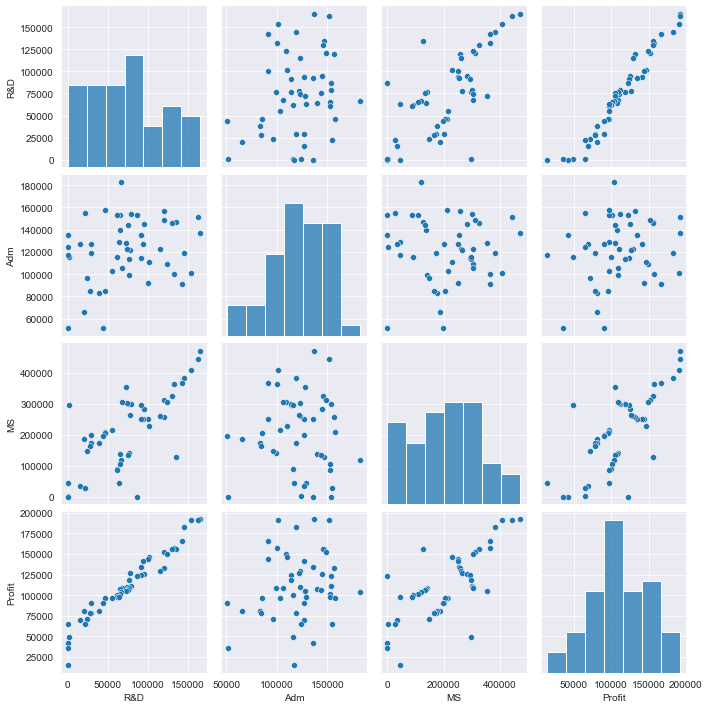

In [19]:
sns.set_style(style='darkgrid')
sns.pairplot(df)

In [26]:
model=smf.ols('Profit~R_D+Adm+MS',data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Tue, 10 Jan 2023   Prob (F-statistic):           4.53e-30
Time:                        00:47:05   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
R_D            0.8057      0.045     17.846      0.000       0.715       0.897
Adm           -0.0268      0.051     -0.526      0.602      -0.130       0.076
MS             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
model.params

Intercept    50122.192990
R_D              0.805715
Adm             -0.026816
MS               0.027228
dtype: float64

In [28]:
model.rsquared,model.rsquared_adj

(0.9507459940683246, 0.9475337762901719)

In [31]:
rsq_R_D=smf.ols('R_D~Adm+MS',data=df).fit().rsquared
vif_R_D=1/(1-rsq_R_D)

rsq_MS=smf.ols('MS~Adm+R_D',data=df).fit().rsquared
vif_MS=1/(1-rsq_MS)

rsq_Adm=smf.ols('Adm~MS+R_D',data=df).fit().rsquared
vif_Adm=1/(1-rsq_Adm)

In [33]:
df2={'variables':['R_D','MS','Adm'],'VIF':[vif_R_D,vif_MS,vif_Adm]}
vif_frame=pd.DataFrame(df2)
vif_frame

,variables,VIF
0,R_D,2.468903
1,MS,2.326773
2,Adm,1.175091


# Treatment for multicollinearity

In [35]:
model1=smf.ols('Profit~R_D+MS',data=df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Tue, 10 Jan 2023   Prob (F-statistic):           2.16e-31
Time:                        01:02:51   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
R_D            0.7966      0.041     19.266      0.000       0.713       0.880
MS             0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
model2=smf.ols('Profit~R_D+Adm',data=df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     426.8
Date:                Tue, 10 Jan 2023   Prob (F-statistic):           7.29e-31
Time:                        01:06:31   Log-Likelihood:                -526.83
No. Observations:                  50   AIC:                             1060.
Df Residuals:                      47   BIC:                             1065.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.489e+04   6016.718      9.122      0.000    4.28e+04     6.7e+04
R_D            0.8621      0.030     28.589      0.000       0.801       0.923
Adm           -0.0530      0.049     -1.073      0.289      -0.152       0.046
==============================================================================
Omnibus:                       14.678   Durbin-Watson:                   1.189
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               20.449
Skew:                          -0.961   Prob(JB):                     3.63e-05
Kurtosis:                       5.474   Cond. No.                     6.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [49]:
model3=smf.ols('Profit~Adm+MS',data=df).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     36.71
Date:                Tue, 10 Jan 2023   Prob (F-statistic):           2.50e-10
Time:                        01:06:41   Log-Likelihood:                -577.13
No. Observations:                  50   AIC:                             1160.
Df Residuals:                      47   BIC:                             1166.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.022e+04   1.77e+04      1.143      0.259   -1.54e+04    5.58e+04
Adm            0.3237      0.131      2.468      0.017       0.060       0.588
MS             0.2488      0.030      8.281      0.000       0.188       0.309
==============================================================================
Omnibus:                        6.584   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                6.524
Skew:                          -0.512   Prob(JB):                       0.0383
Kurtosis:                       4.443   Cond. No.                     1.30e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

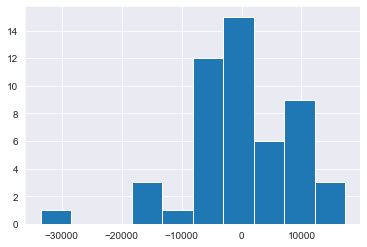

In [54]:
plt.hist(model.resid,bins=10)
plt.show()

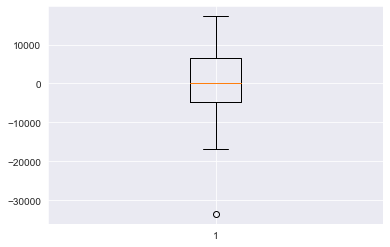

In [53]:
plt.boxplot(model.resid)
plt.show()

Text(0.5, 1.0, 'Normal Q-Q Plot')

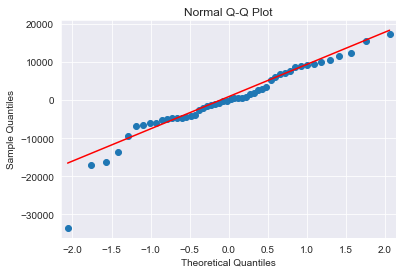

In [61]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q')
plt.title('Normal Q-Q Plot')

# Residual plot for Homoscadasticity

In [62]:
def get_standardized_values(vals):
    return(vals-vals.mean()/vals.std())

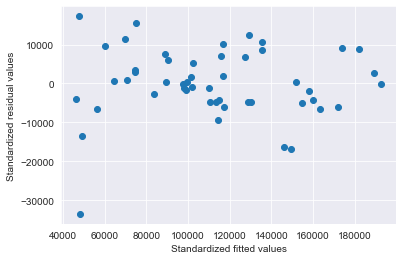

In [63]:
plt.scatter(get_standardized_values(model.fittedvalues),get_standardized_values(model.resid))
plt.xlabel('Standardized fitted values')
plt.ylabel('Standardized residual values')
plt.show()

eval_env: 1


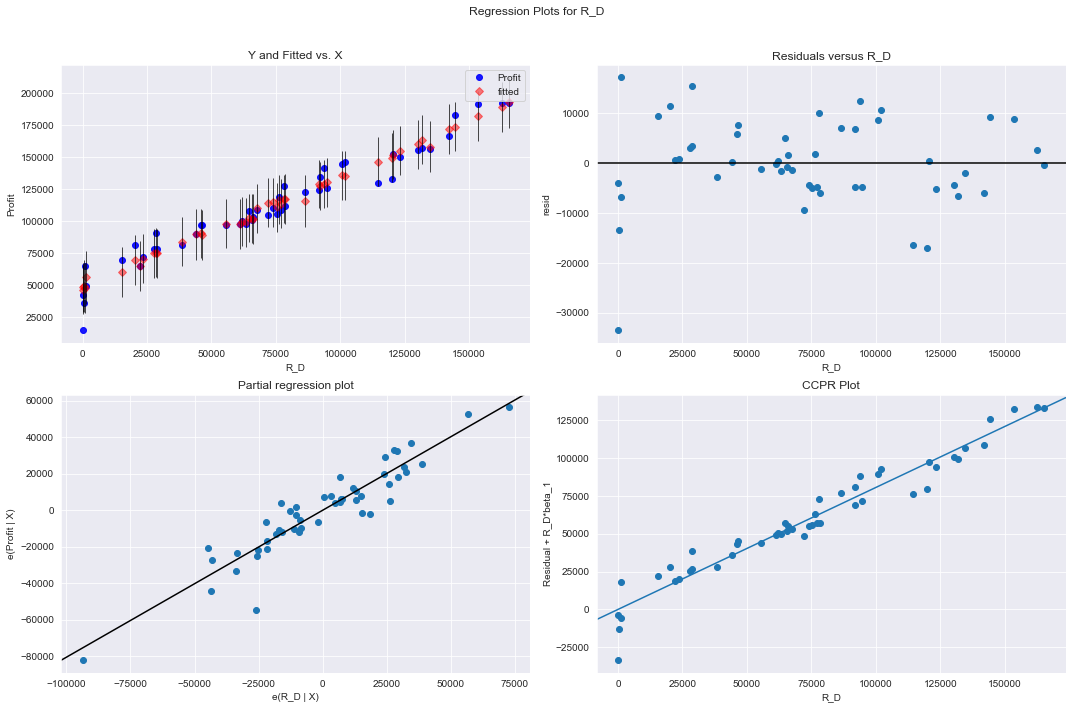

In [64]:
fig=plt.figure(figsize=(15,10))
sm.graphics.plot_regress_exog(model,'R_D',fig=fig)
plt.show()

eval_env: 1


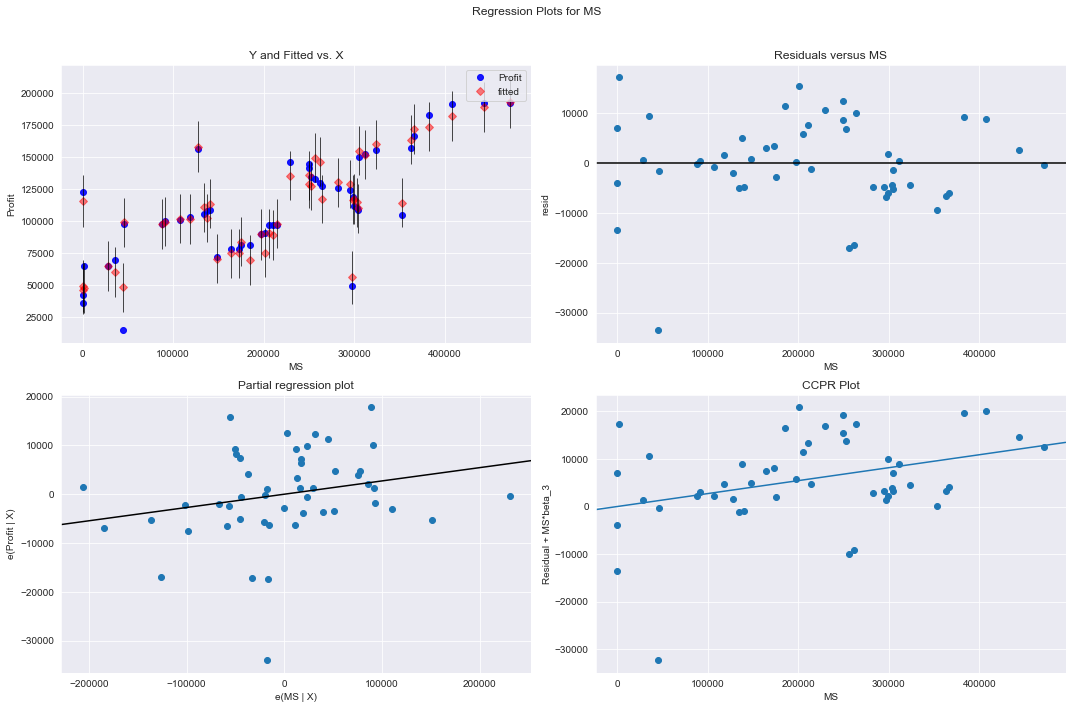

In [65]:
fig=plt.figure(figsize=(15,10))
sm.graphics.plot_regress_exog(model,'MS',fig=fig)
plt.show()

eval_env: 1


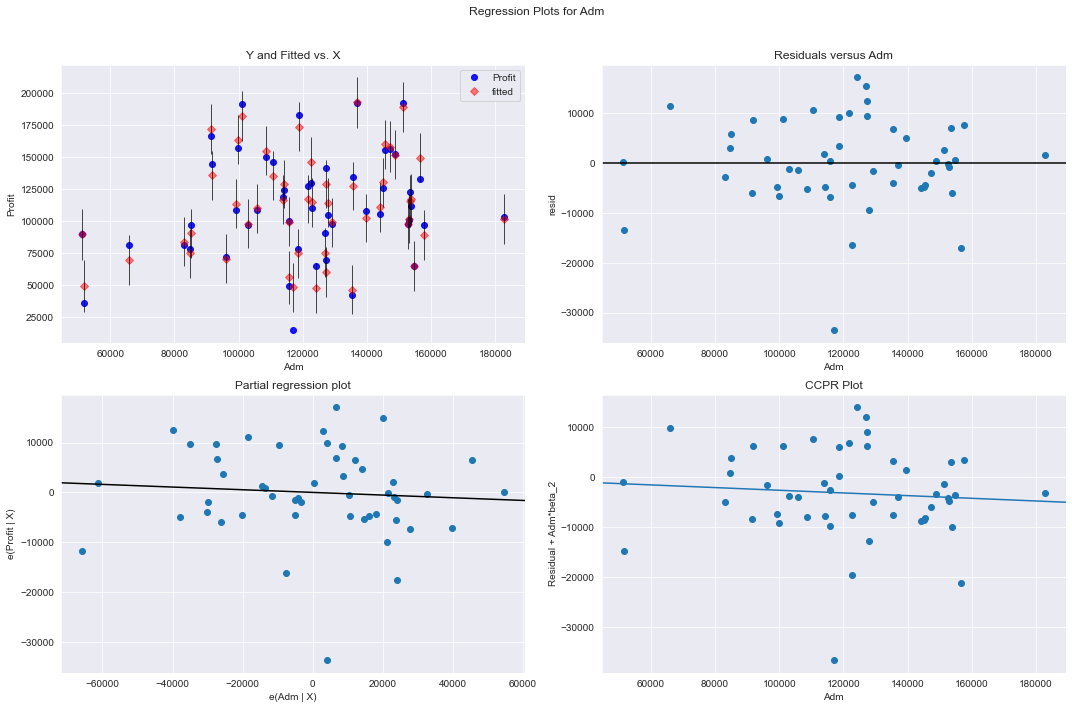

In [66]:
fig=plt.figure(figsize=(15,10))
sm.graphics.plot_regress_exog(model,'Adm',fig=fig)
plt.show()

In [67]:
model_influence=model.get_influence()
(c,_)=model_influence.cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

In [68]:
K=3
N=50
C=3*(K+1)/N
C

0.24

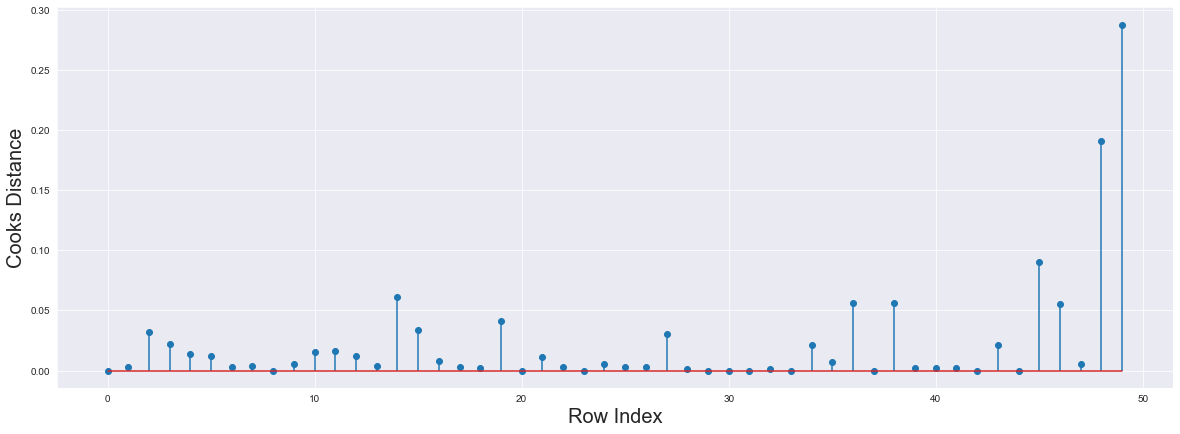

In [69]:
plt.figure(figsize=(20,7))
plt.stem(np.arange(len(data)),np.round(c,3))
plt.xlabel('Row Index',size=20)
plt.ylabel('Cooks Distance',size=20)
plt.show()


In [70]:
np.where(c>0.24)

(array([49], dtype=int64),)

In [71]:
(np.argmax(c),np.max(c))

(49, 0.28808229275432634)

In [76]:
df_new=df.drop(df.index[[49]],axis=0)
df_new.tail()

,R_D,Adm,MS,State,Profit
44,22177.74,154806.14,28334.72,California,65200.33
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41


In [80]:
df2=df_new.drop('State',axis=1)
df2.head()

,R_D,Adm,MS,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [82]:
final_model=smf.ols('Profit~R_D+MS',data=df2).fit()
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     568.0
Date:                Tue, 10 Jan 2023   Prob (F-statistic):           3.74e-33
Time:                        01:39:07   Log-Likelihood:                -506.43
No. Observations:                  49   AIC:                             1019.
Df Residuals:                      46   BIC:                             1025.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.979e+04   2341.584     21.261      0.000    4.51e+04    5.45e+04
R_D            0.7754      0.035     22.136      0.000       0.705       0.846
MS             0.0274      0.013      2.104      0.041       0.001       0.054
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.546
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.273
Skew:                          -0.051   Prob(JB):                        0.872
Kurtosis:                       2.649   Cond. No.                     5.52e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [83]:
d2={"Models":['Basic Model','Final Model'],"R Squared":[model.rsquared,final_model.rsquared]}
table=pd.DataFrame(d2)
print(table)

        Models  R Squared
0  Basic Model   0.950746
1  Final Model   0.961086
